<a href="https://colab.research.google.com/github/ruizleandro/Credit-Card-Fraud-Detection/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Objectives of the Project

The main objective of this project is to build a model that can be capable of detect fraudulent transactions without target labels, using unsupervised machine learning algorithms. Also, I'll be using two supervised models for comparison reasons.

## Models Used

I'll start with two unsupervised machine learning models, mainly because I want to explore anomaly detection with unsupervised learning techniques so the algorithm can be used for detecting new forms of frauds. 

For this task I'll use:
* Principal Component Analysis to create a model that can learn and detect forms of fraud without the help of labels. 
* Independent Component Analysis so I can compare the different types of component analysis.

Later, I will complete the model selection with two supervised models: One-Class Support Vector Machines and K-means Clustering.

## Data and Modules

### Getting the Data

[Link to dataset's Kaggle page](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving credit_card_fraud_detection.csv to credit_card_fraud_detection.csv
User uploaded file "credit_card_fraud_detection.csv" with length 150828752 bytes


In [0]:
df = pd.read_csv('credit_card_fraud_detection.csv')

### Libraries Installation

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis

In this dataset there are no missing values and the documentation lacks of feature explanation, so I can't make a very extended data exploration.


## Basic Analysis

In [4]:
df.head(10)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5   2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6   4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7   7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8   7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9   9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0

[10 rows x 31 columns]

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Transactions according to time

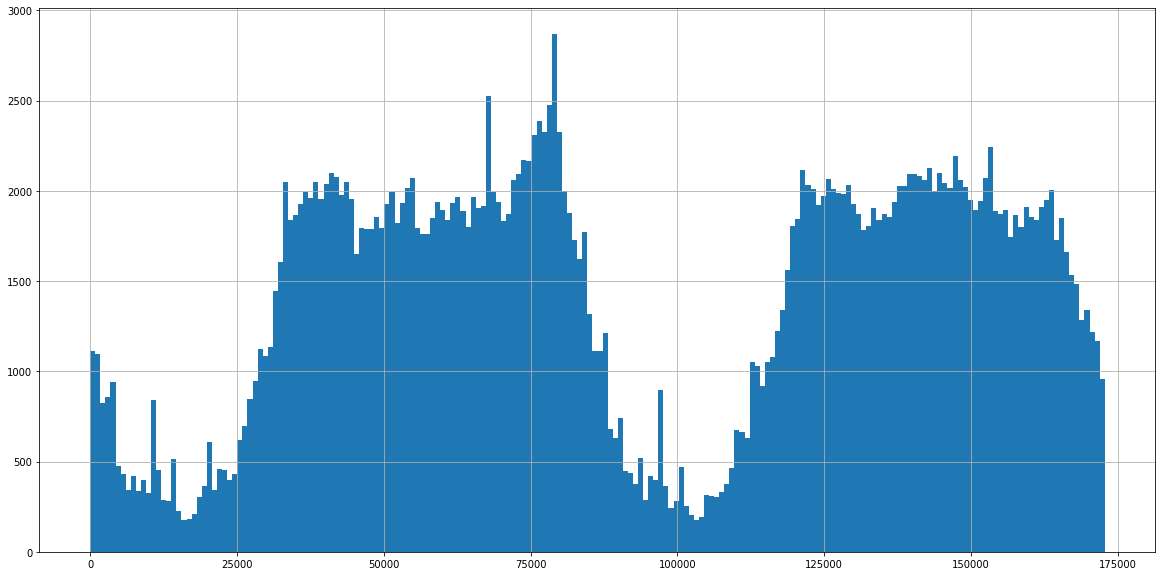

In [7]:
df.Time.hist(bins=200, figsize=(20,10))

## Correlations

In [8]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

The feature that correlates the most with the class of the transactions is `V17`.

In [9]:
corr_matrix['V17'].sort_values(ascending=False)

V17       1.000000e+00
Amount    7.309042e-03
V14       4.626140e-15
V10       3.674182e-15
V16       1.854297e-15
V7        1.149692e-15
V27       8.844373e-16
V11       8.719713e-16
V9        6.535992e-16
V23       5.367784e-16
V26       4.870302e-16
V25       4.822068e-16
V6        3.567582e-16
V15       3.208310e-16
V5        1.425729e-16
V3        4.576619e-17
V24      -5.543631e-17
V28      -2.182692e-16
V13      -3.187905e-16
V8       -3.508777e-16
V19      -3.916791e-16
V4       -4.397925e-16
V1       -5.011524e-16
V21      -7.753967e-16
V22      -8.389703e-16
V12      -9.869814e-16
V2       -9.883008e-16
V20      -9.887431e-16
V18      -5.584714e-15
Time     -7.329721e-02
Class    -3.264811e-01
Name: V17, dtype: float64

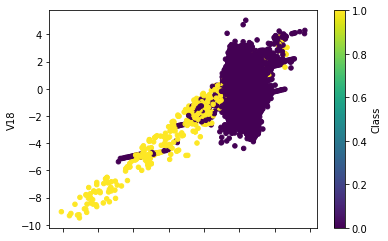

In [11]:
ax2 = df.plot.scatter(x='V17',
                      y='V18',
                      c='Class',
                      colormap='viridis')

## Scatter Plots of the Features

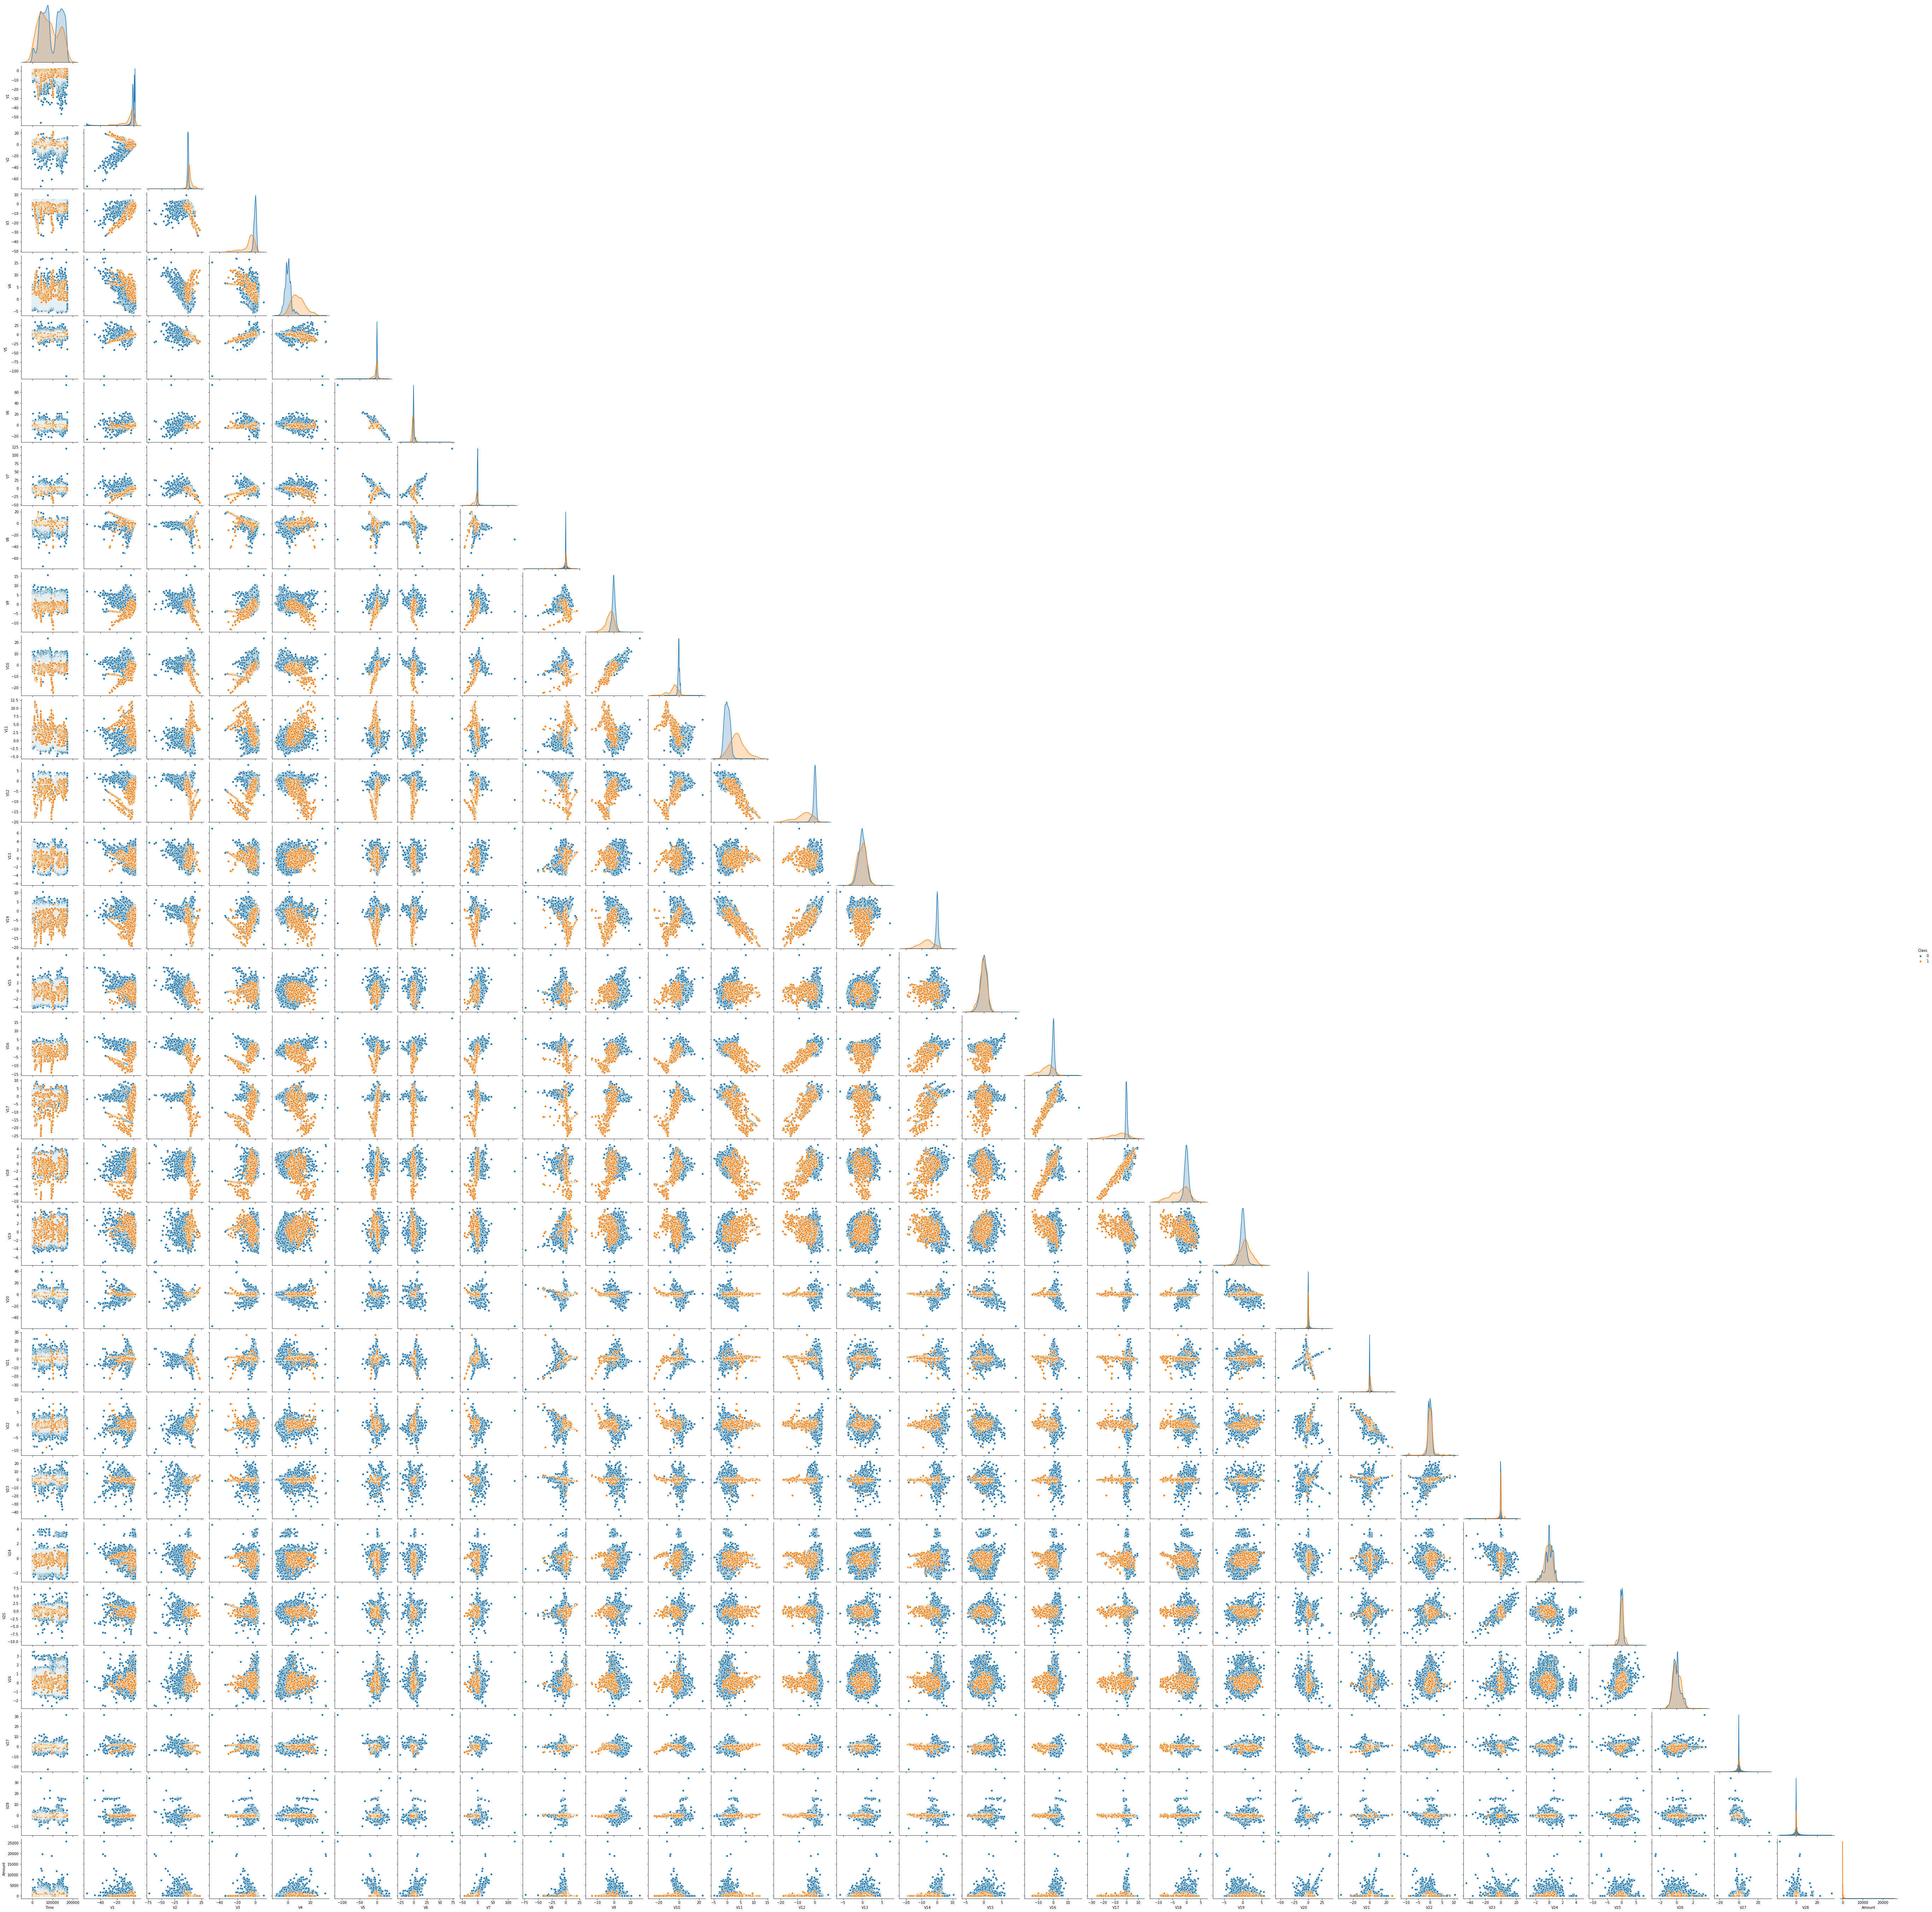

In [13]:
import seaborn as sns
sns.pairplot(df, hue='Class', corner=True)

## Histogram of Every Feature

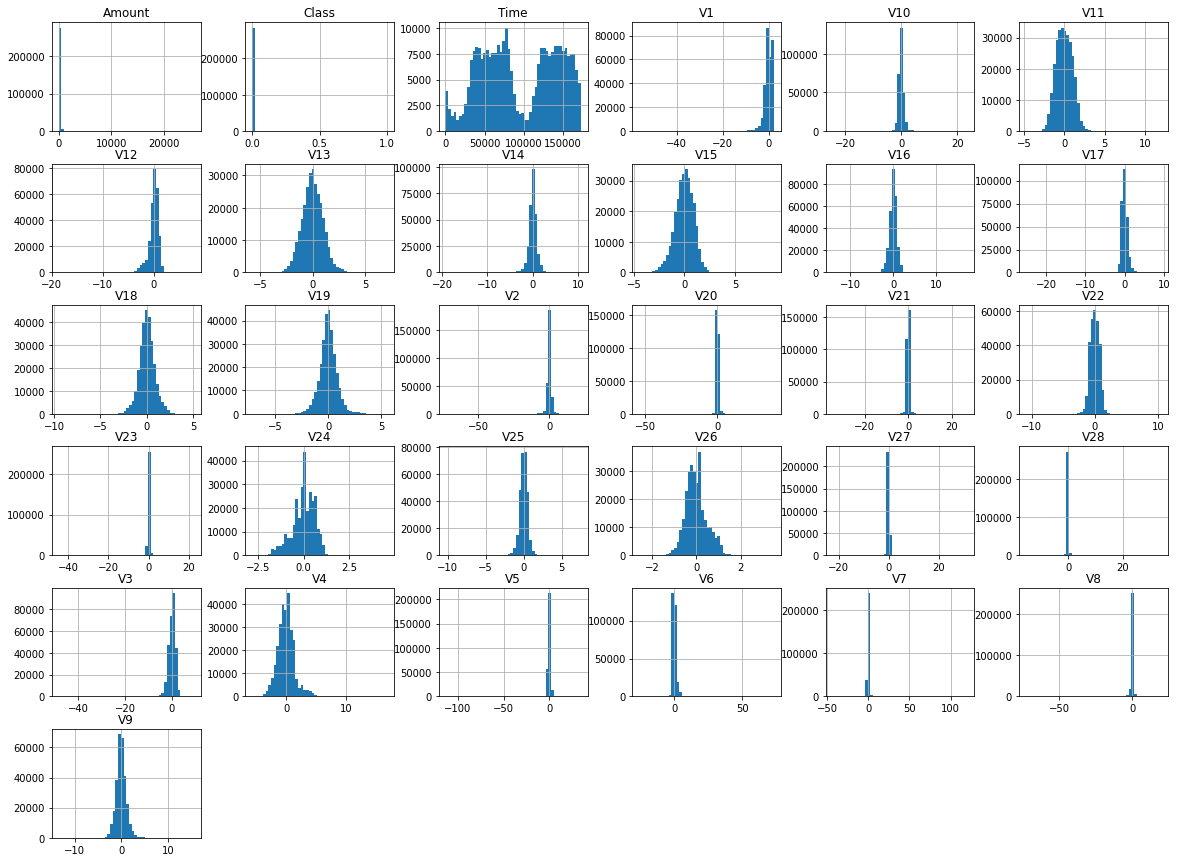

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Correlation Matrix

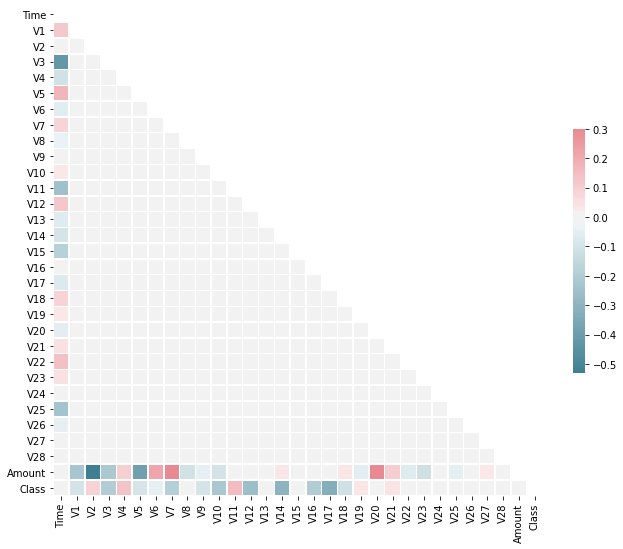

In [15]:
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Fraud Analysis

Number of normal and fraudulent transactions:

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('Frauds are the', (sum(df.Class == 1) * 100 / len(df)),
      '% of the transactions.')

Frauds are the 0.1727485630620034 % of the transactions.


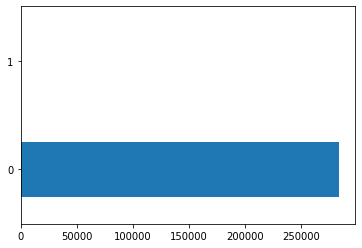

In [8]:
df.Class.value_counts().plot(kind = 'barh')

In [0]:
Fraud = df[df['Class']==1]
Not_fraud = df[df['Class']==0]

In [10]:
print(Fraud.shape)
print(Not_fraud.shape)

(492, 31)
(284315, 31)


In [11]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As we can see here, the mean fraudulent transaction is for `$122,21`. But the median is only `$9,25`. That means that the frauds are in their majority, for that quantity or less.

As we can see in the following histogram:

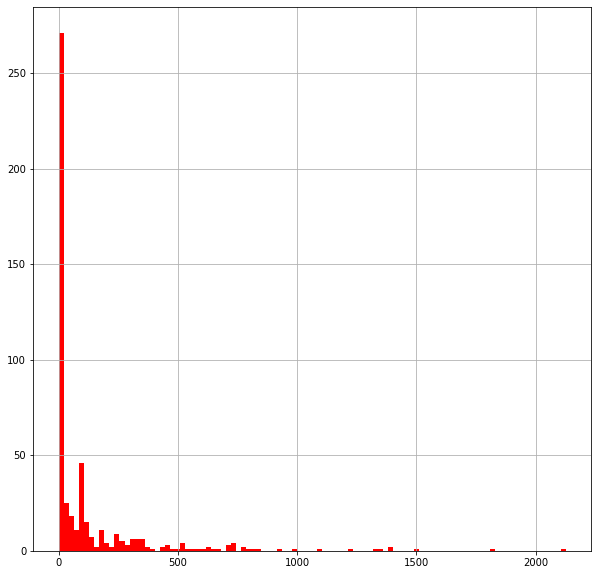

In [12]:
Fraud.Amount.hist(bins=100, color="red", figsize=(10,10))

And in comparison to the normal transactions:

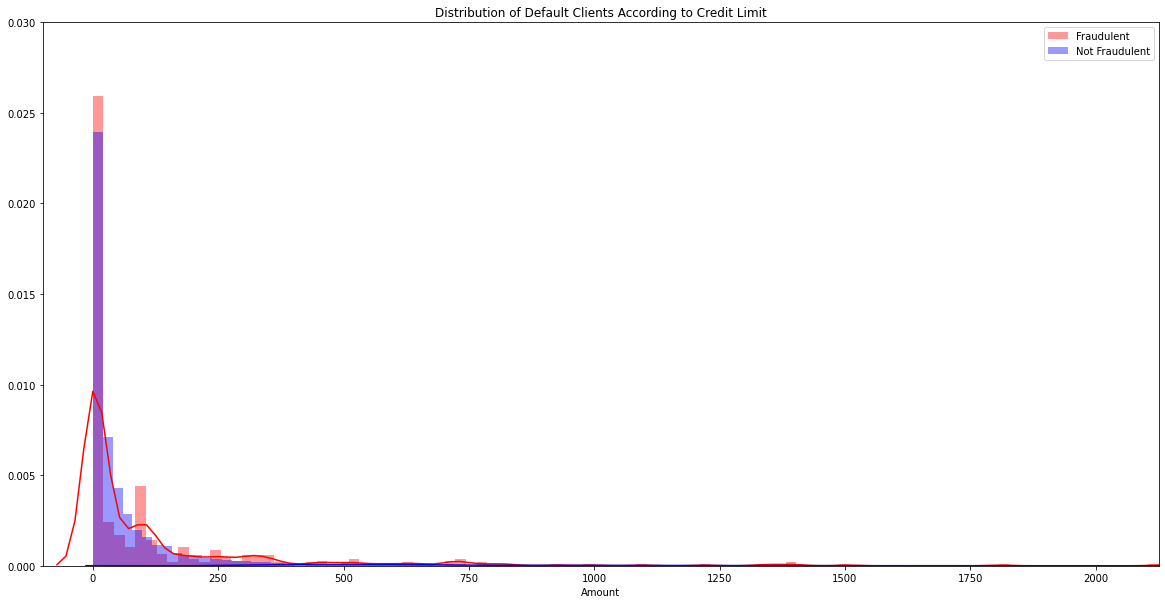

In [13]:
class_0 = df.loc[df['Class'] == 0]["Amount"]
class_1 = df.loc[df['Class'] == 1]["Amount"]
plt.figure(figsize = (20,10))
plt.ylim((0, 0.03))
plt.xlim((-100, 2126))
plt.title('Distribution of Default Clients According to Credit Limit')
sns.set_color_codes("pastel")
sns.distplot(class_1, kde=True, bins=100, color="red", label='Fraudulent')
sns.distplot(class_0, kde=True, bins=1300, color="blue", label='Not Fraudulent')
plt.legend()
plt.show()